# Imports

In [1]:
from qiskit import *
from qiskit import Aer
from qiskit import IBMQ
from qiskit.visualization import plot_histogram

IBMQ.load_account()

/var/folders/md/4zhz38fs2rn1cm3sh6w4bcbr0000gn/T/ipykernel_2537/1313054779.py:6: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/var/folders/md/4zhz38fs2rn1cm3sh6w4bcbr0000gn/T/ipykernel_2537/1313054779.py:6: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Functions to add the SUM and Carry circuits to existing circuit

In [2]:
def addSum(circuit, first_bit):
    circuit.cx(first_bit+1, first_bit+2)
    circuit.cx(first_bit, first_bit+2)

In [3]:
def addCarry(circuit, first_bit):
    circuit.ccx(first_bit+1, first_bit+2, first_bit+3)
    circuit.cx(first_bit+1, first_bit+2)
    circuit.ccx(first_bit, first_bit+2, first_bit+3)

In [4]:
def addCarryI(circuit, first_bit):
    circuit.ccx(first_bit, first_bit+2, first_bit+3)
    circuit.cx(first_bit+1, first_bit+2)
    circuit.ccx(first_bit+1, first_bit+2, first_bit+3)

# Create the circuit and draw the full adder circuit for 3 bits

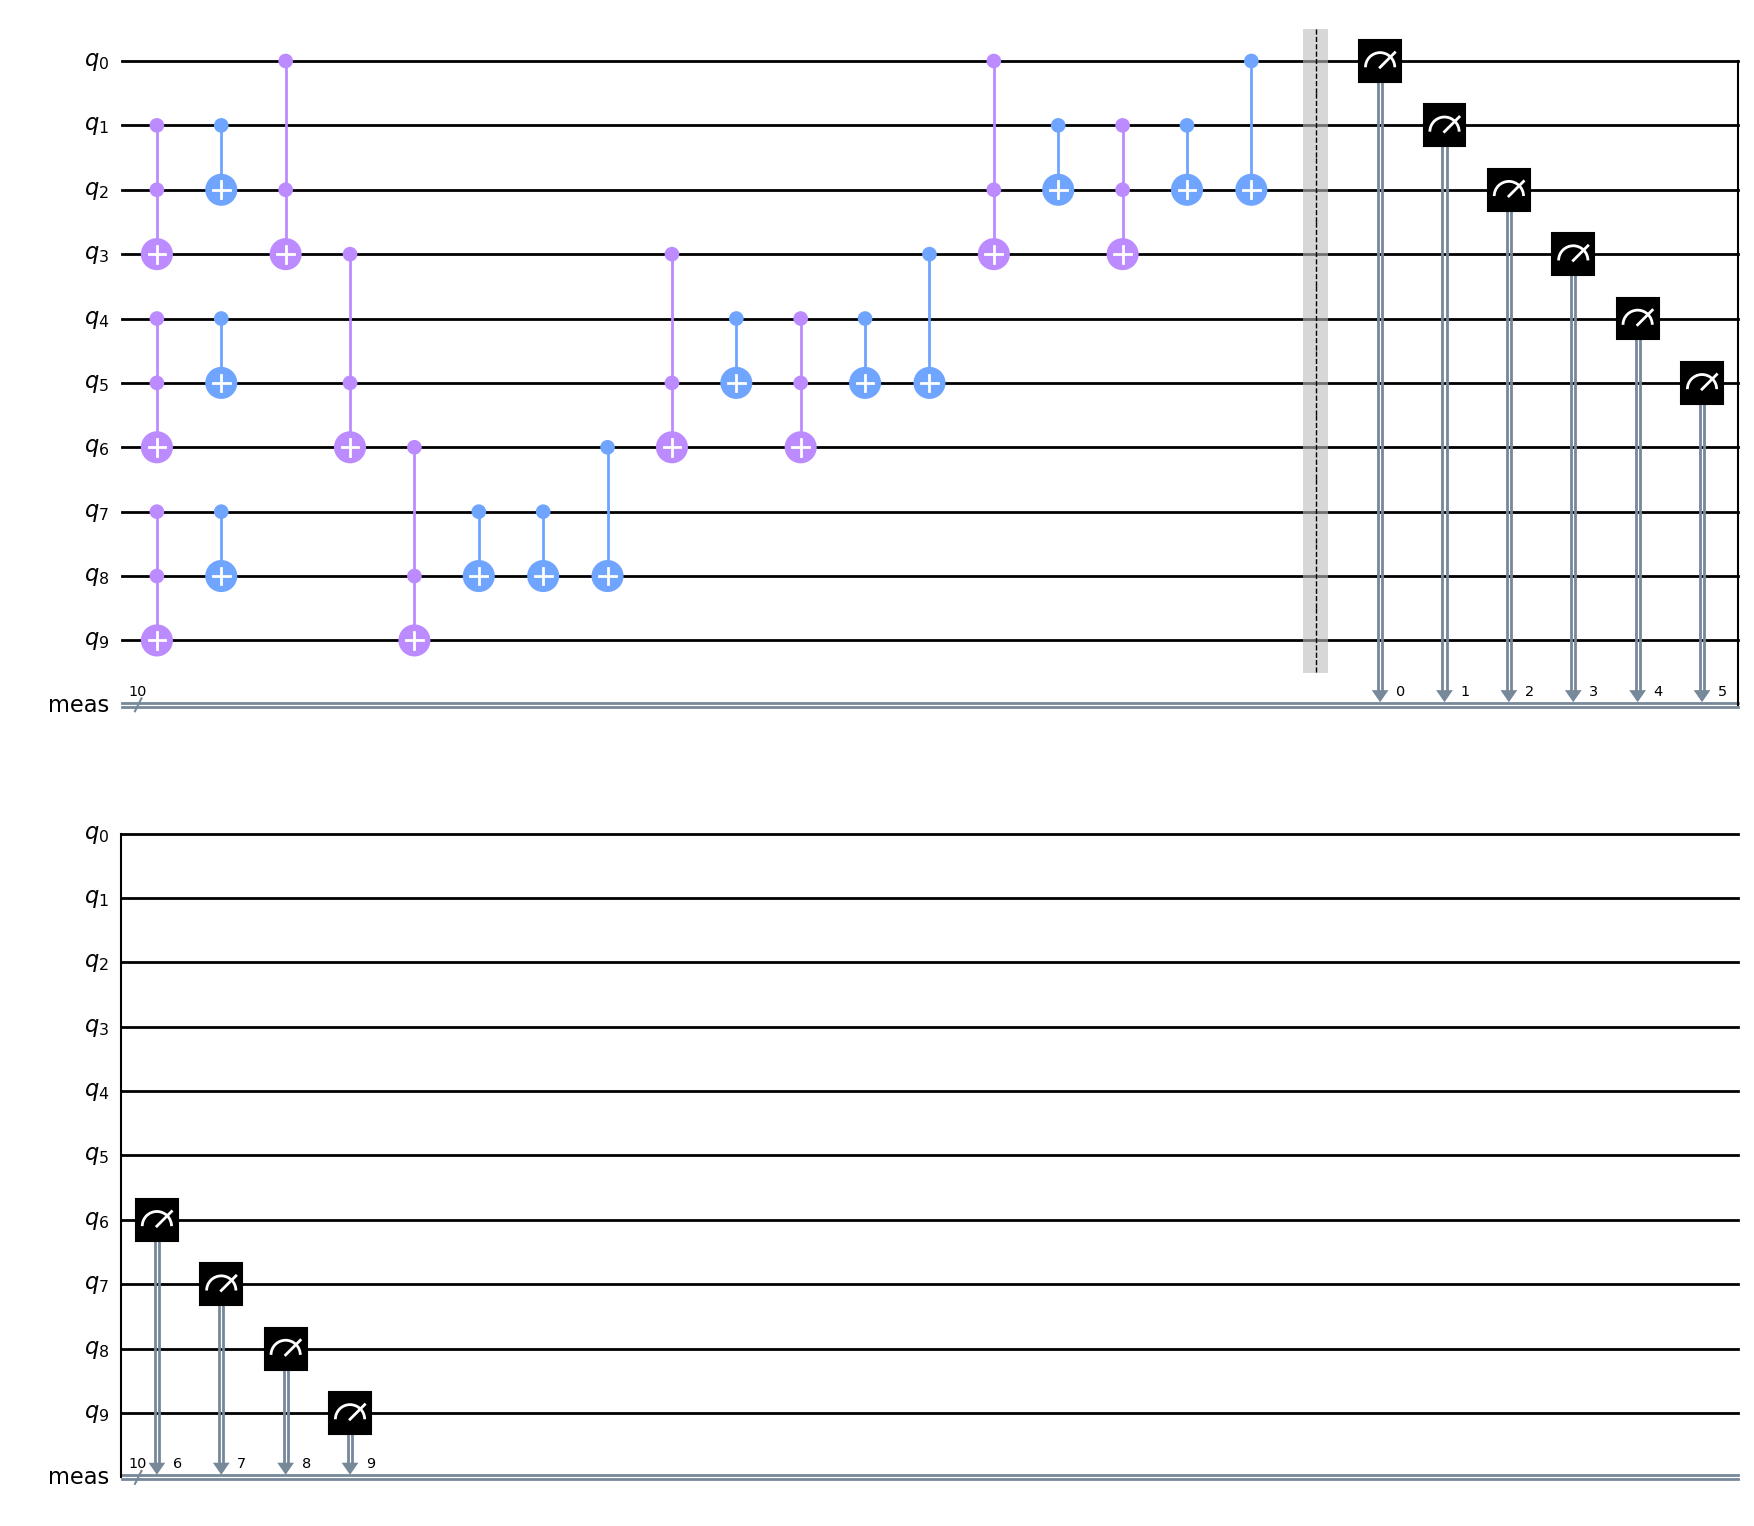

In [5]:
circ = QuantumCircuit(10)
addCarry(circ, 0)
addCarry(circ, 3)
addCarry(circ, 6)
circ.cx(7, 8)
addSum(circ, 6)
addCarryI(circ, 3)
addSum(circ, 3)
addCarryI(circ, 0)
addSum(circ, 0)
circ.measure_all()

circ.draw('mpl')

# Function that takes in two 2 bit binary numbers and returns the sum

In [6]:
def sum2(a, b):
    a = list(a[::-1])
    b = list(b[::-1])
    a = [i*3 + 1 for i, x in enumerate(a) if x == '1']
    b = [i*3 +2 for i, x in enumerate(b) if x == '1']
    circ = QuantumCircuit(7,3)
    if (a):
        circ.x(a)
    if (b):
        circ.x(b)
    addCarry(circ, 0)
    addCarry(circ, 3)
    circ.cx(4, 5)
    addSum(circ, 3)
    addCarryI(circ, 0)
    addSum(circ, 0)
    circ.measure([2,5,6], [0,1,2])

    return circ

Simulation

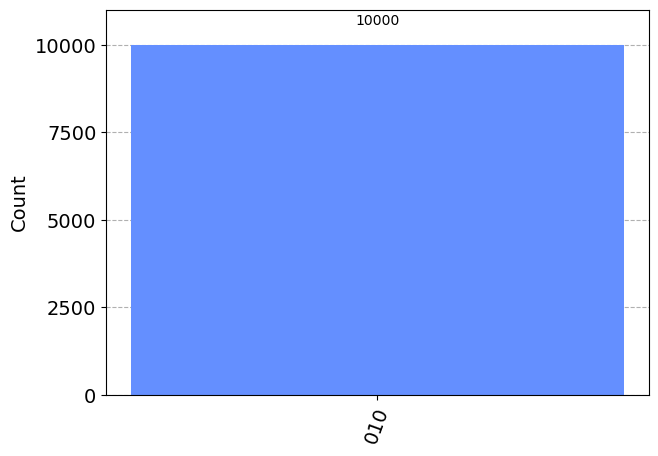

In [7]:
a = input('What is the first binary number?')
b = input('What is the second binary number?')
circ = sum2(a, b)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=10000)
result = job.result().get_counts()
plot_histogram(result)

Run in quantum computer

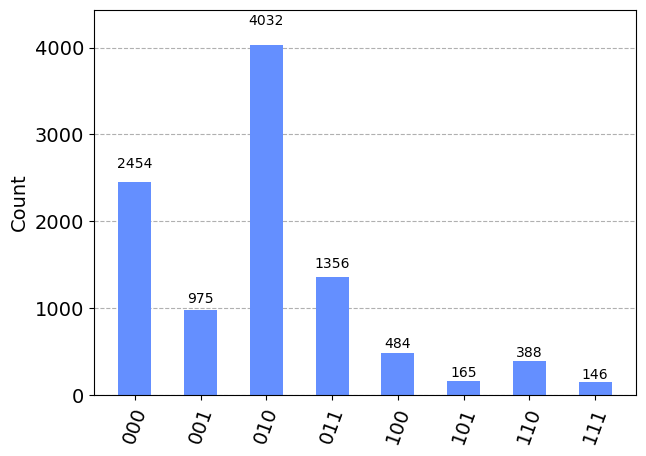

In [8]:
a = input('What is the first binary number?')
b = input('What is the second binary number?')
adder = sum2(a, b)
#run on real quantum computer
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibm_nairobi')
job = execute(adder, backend, shots=10000)
result = job.result().get_counts()
plot_histogram(result)

# Function that takes in two 3 bit binary numbers and returns the sum

In [9]:
def sum3(a, b):
    a = list(a[::-1])
    b = list(b[::-1])
    a = [i*3 + 1 for i, x in enumerate(a) if x == '1']
    b = [i*3 +2 for i, x in enumerate(b) if x == '1']
    circ = QuantumCircuit(10,4)
    if (a):
        circ.x(a)
    if (b):
        circ.x(b)
    addCarry(circ, 0)
    addCarry(circ, 3)
    addCarry(circ, 6)
    circ.cx(7, 8)
    addSum(circ, 6)
    addCarryI(circ, 3)
    addSum(circ, 3)
    addCarryI(circ, 0)
    addSum(circ, 0)
    circ.measure([2,5,8,9], [0,1,2,3])

    return circ

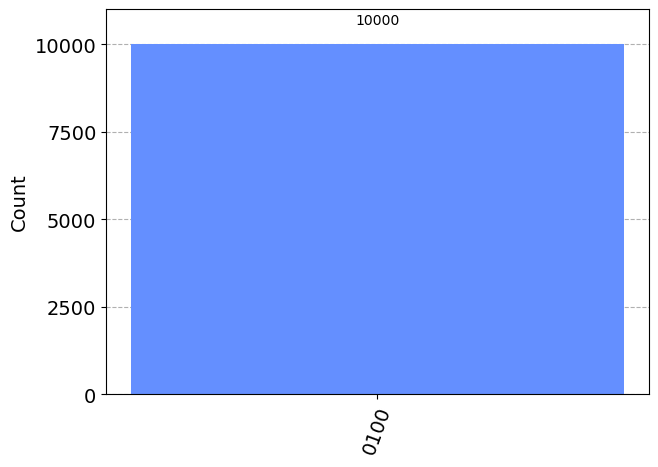

In [13]:
a = input('What is the first binary number?')
b = input('What is the second binary number?')
circ = sum3(a, b)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=10000)
result = job.result().get_counts()
plot_histogram(result)